In [1]:
import pandas as pd

df = pd.read_csv("data/Microsoft_Stock.csv", parse_dates=["Date"])
df.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
5,2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861
6,2015-04-10 16:00:00,41.63,41.95,41.41,41.72,28022002
7,2015-04-13 16:00:00,41.40,42.06,41.39,41.76,30276692
8,2015-04-14 16:00:00,41.80,42.03,41.39,41.65,24244382
9,2015-04-15 16:00:00,41.76,42.46,41.68,42.26,27343581


In [2]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [4]:
df['Date'] = df['Date'].dt.date # Extract only the date part
df['Volume'] = df['Volume'].astype(float)

In [5]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

df = df.sort_values("Date").set_index("Date")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322.0
2015-04-02,40.66,40.74,40.12,40.29,37487476.0
2015-04-06,40.34,41.78,40.18,41.55,39223692.0
2015-04-07,41.61,41.91,41.31,41.53,28809375.0
2015-04-08,41.48,41.69,41.04,41.42,24753438.0


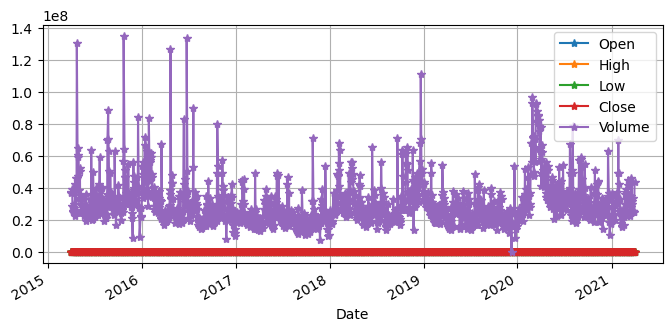

In [7]:
import matplotlib.pyplot as plt

df.index = pd.to_datetime(df.index)
df['2015-04':].plot(grid=True, marker='*', figsize=(8, 3.5))
plt.show()

#### 12 month rolling average

In [8]:
period = slice("2015", "2021")
df_monthly = df.resample("M").mean()
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()

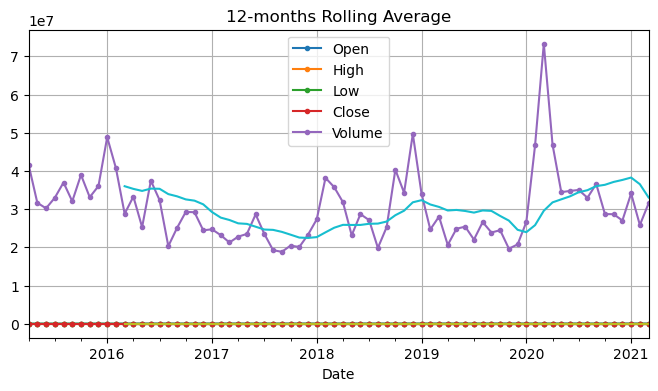

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
plt.title("12-months Rolling Average")
plt.show()

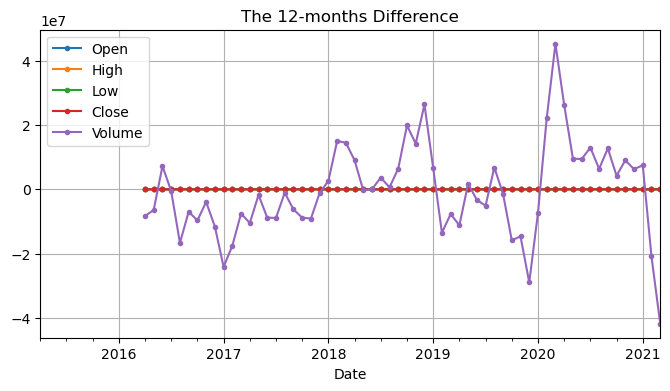

In [12]:
df_monthly.diff(12)[period].plot(grid=True, marker=".", figsize=(8,4))
plt.title("The 12-months Difference")
plt.show()

It seems the volumn attribute has more visibility than other attributes, let's build a sequential predictive model for the with that.